## Install dependencies

In [10]:
from datetime import datetime, timedelta, timezone
import pandas as pd
import numpy as np
import requests
import os

## Variables

In [11]:
current_storage = os.path.join("d:", "data")
vn30f_storage = os.path.join(current_storage, 'vn30f')

start_time = 0
now_time = 9999999999
symbol = 'VN30F1M'

## Formulas

In [12]:
def split_data(data):
    """
    Hàm này chia dữ liệu thành 2 phần: tập huấn luyện và tập hold out.

    Args:
    data (pandas.DataFrame): DataFrame chứa dữ liệu cần chia.

    Returns:
    pandas.DataFrame: DataFrame chứa dữ liệu tập huấn luyện.
    pandas.DataFrame: DataFrame chứa dữ liệu tập giữ lại.
    """
    # Chia dữ liệu thành 3 phần
    new_part = np.array_split(data, 3)

    # Access each part individually
    hold_out = new_part[2]
    train_data = pd.concat([new_part[0], new_part[1]], axis=0)

    return train_data, hold_out

## Get data

In [13]:
def get_vn30f(start_time, now_time, symbol):
    def vn30f():
            return requests.get(f"https://services.entrade.com.vn/chart-api/chart?from={start_time}&resolution=1&symbol={symbol}&to={now_time}").json()
    vn30fm = pd.DataFrame(vn30f()).iloc[:,:6]
    vn30fm['t'] = vn30fm['t'].astype(int).apply(lambda x: datetime.utcfromtimestamp(x) + timedelta(hours = 7))
    vn30fm.columns = ['Date','Open','High','Low','Close','Volume']
    ohlc_dict = {                                                                                                             
        'Open': 'first',                                                                                                    
        'High': 'max',                                                                                                       
        'Low': 'min',                                                         
        'Close': 'last',                                                                                                    
        'Volume': 'sum',}
    vn30fm = pd.DataFrame(vn30f()).iloc[:,:6]
    vn30fm['t'] = vn30fm['t'].astype(int).apply(lambda x: datetime.utcfromtimestamp(x) + timedelta(hours = 7))
    vn30fm.columns = ['Date','Open','High','Low','Close','Volume']
    dt_object = datetime.utcfromtimestamp(start_time) + timedelta(hours = 7)
    now_object = datetime.utcfromtimestamp(now_time) + timedelta(hours = 7)

    print(f'===> Data {symbol} from {dt_object} to {now_object} has been appended ')
    
    return vn30fm

In [14]:
df = get_vn30f(start_time, now_time, symbol)

===> Data VN30F1M from 1970-01-01 07:00:00 to 2286-11-21 00:46:39 has been appended 


## EDA

In [15]:
from pandas import Series,DataFrame
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [16]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2018-08-13 09:00:00,943.5,943.5,942.9,942.9,975
1,2018-08-13 09:01:00,943.0,943.1,942.9,943.1,220
2,2018-08-13 09:02:00,943.0,943.6,943.0,943.5,121
3,2018-08-13 09:03:00,943.3,943.4,943.3,943.4,135
4,2018-08-13 09:04:00,943.2,943.2,943.0,943.1,361


In [17]:
df.describe(exclude=['datetime'])

,Open,High,Low,Close,Volume
count,318839.000000,318839.000000,318839.000000,318839.000000,318839.000000
mean,1091.805325,1092.167728,1091.443346,1091.805291,775.237621
std,244.571166,244.653298,244.487368,244.569480,1032.053394
min,563.000000,566.000000,560.100000,565.000000,1.000000
25%,884.500000,884.600000,884.300000,884.500000,276.000000
50%,1044.900000,1045.300000,1044.400000,1044.900000,531.000000
75%,1270.800000,1271.300000,1270.400000,1270.800000,962.000000
max,1576.600000,1576.900000,1575.800000,1576.700000,158907.000000


- Sự Biến Động: Các giá trị độ lệch chuẩn cao cho thấy thị trường có sự biến động mạnh, điều này có thể cung cấp nhiều cơ hội cho các nhà đầu tư nhưng cũng đi kèm với rủi ro cao.
- Khối Lượng Giao Dịch: Biến động lớn trong khối lượng giao dịch cũng là một yếu tố quan trọng, cho thấy sự không đồng nhất trong hoạt động giao dịch hàng ngày.

Khối lượng giao dịch trung bình là 775.24, nhưng độ lệch chuẩn rất cao (1,032.05), cho thấy có sự biến động lớn trong khối lượng giao dịch.
Khối lượng giao dịch lớn nhất là 158,907, cho thấy có những ngày giao dịch đặc biệt sôi động.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318839 entries, 0 to 318838
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    318839 non-null  datetime64[ns]
 1   Open    318839 non-null  float64       
 2   High    318839 non-null  float64       
 3   Low     318839 non-null  float64       
 4   Close   318839 non-null  float64       
 5   Volume  318839 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 14.6 MB


In [19]:
sub_df = df.copy()
sub_df.set_index('Date', inplace=True)

In [20]:
sub_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-08-13 09:00:00,943.5,943.5,942.9,942.9,975
2018-08-13 09:01:00,943.0,943.1,942.9,943.1,220
2018-08-13 09:02:00,943.0,943.6,943.0,943.5,121
2018-08-13 09:03:00,943.3,943.4,943.3,943.4,135
2018-08-13 09:04:00,943.2,943.2,943.0,943.1,361


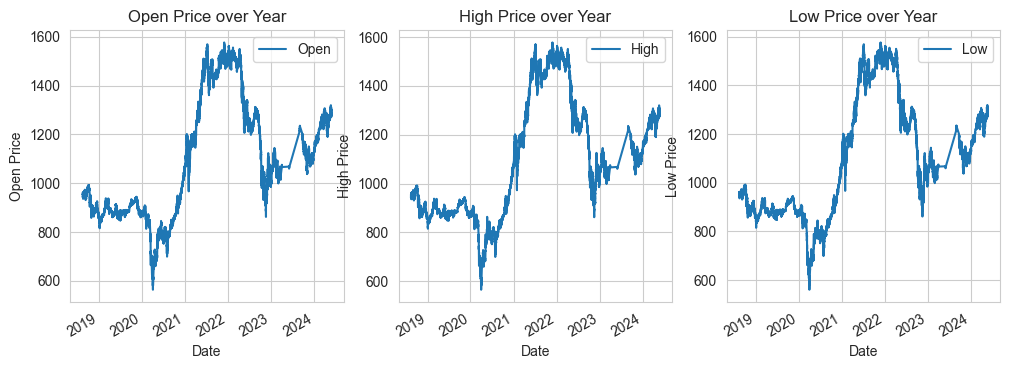

In [21]:
columns = ['Open', 'High', 'Low']
# Tạo các subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i, column in enumerate(columns):
    if i < len(axs):  # Kiểm tra xem chỉ vẽ đồ thị nếu vẫn còn subplot
        sub_df[column].plot(ax=axs[i], legend=True)

        axs[i].set_title(f'{column} Price over Year')
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel(f'{column} Price')

Xu Hướng Chung: Cả giá mở cửa, giá cao, giá thấp và giá đóng cửa đều có xu hướng tương tự, với sự tăng mạnh từ năm 2020 đến đầu năm 2021, giảm vào năm 2022 và hồi phục từ năm 2023.

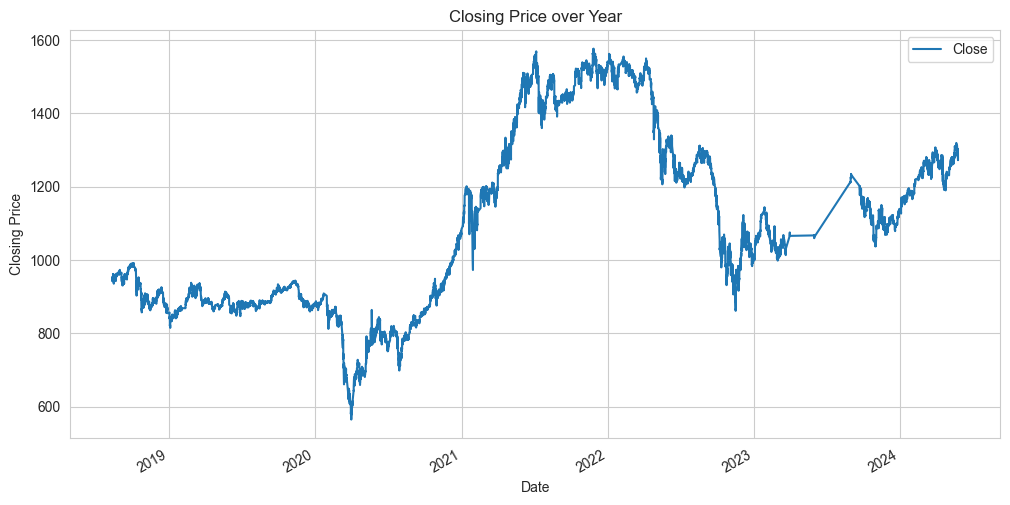

In [22]:
sub_df['Close'].plot(legend=True, figsize = (12, 6))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price over Year')
plt.show()

Biểu đồ 1: Giá Đóng Cửa Theo Năm
Xu hướng tổng quan:
Giá đóng cửa duy trì ổn định trong năm 2019 và đầu năm 2020, dao động trong khoảng 700 đến 1000.
Từ giữa năm 2020 đến giữa năm 2021, giá tăng mạnh và đạt đỉnh khoảng 1600, phản ánh sự phục hồi kinh tế sau khủng hoảng.
Sau khi đạt đỉnh, giá giảm mạnh trong năm 2021 và đầu năm 2022, dao động quanh mức 1000 đến 1200, có thể do các yếu tố rủi ro thị trường và lạm phát.
Từ giữa năm 2022 đến năm 2024, giá chứng khoán phục hồi và tăng dần, thể hiện xu hướng tăng trưởng tích cực và ổn định hơn.

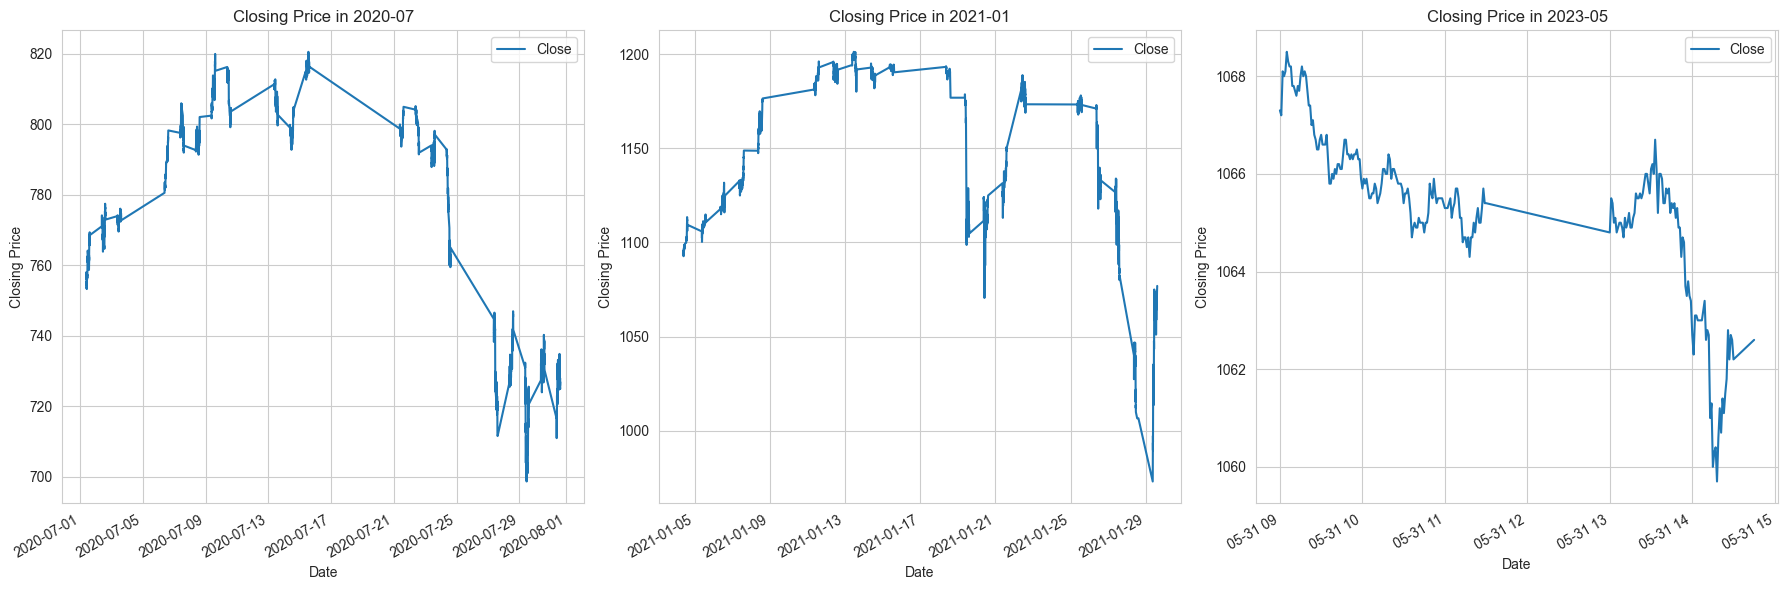

In [24]:
# Lấy ngẫu nhiên 3 khoảng thời gian, mỗi khoảng kéo dài một tháng
def get_random_months(data, num_months=3):
    import random
    # Lấy danh sách các tháng có trong dữ liệu
    months = data.index.to_period('M').unique()
    # Chọn ngẫu nhiên các tháng
    selected_months = random.sample(list(months), num_months)
    return selected_months

# Hàm để lấy dữ liệu trong khoảng thời gian một tháng
def get_data_for_month(data, month):
    return data[data.index.to_period('M') == month]

# Lấy 3 tháng ngẫu nhiên
selected_months = get_random_months(sub_df)

# Tạo các subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Vẽ dữ liệu cho mỗi tháng ngẫu nhiên
for i, month in enumerate(selected_months):
    month_data = get_data_for_month(sub_df, month)
    month_data['Close'].plot(ax=axs[i], legend=True)
    axs[i].set_title(f'Closing Price in {month}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Closing Price')

plt.tight_layout()
plt.show()

- Khung Thời Gian Ngắn: Biến động giá có thể thay đổi đáng kể trong các khoảng thời gian ngắn, cho thấy sự thay đổi nhanh chóng trong tâm lý thị trường hoặc phản ứng với các sự kiện ngắn hạn.
- Biến Động Cao: Cả ba tháng đều cho thấy mức độ biến động cao, với các đợt tăng và giảm mạnh. Điều này cho thấy thị trường trong các tháng này có tính không ổn định cao.

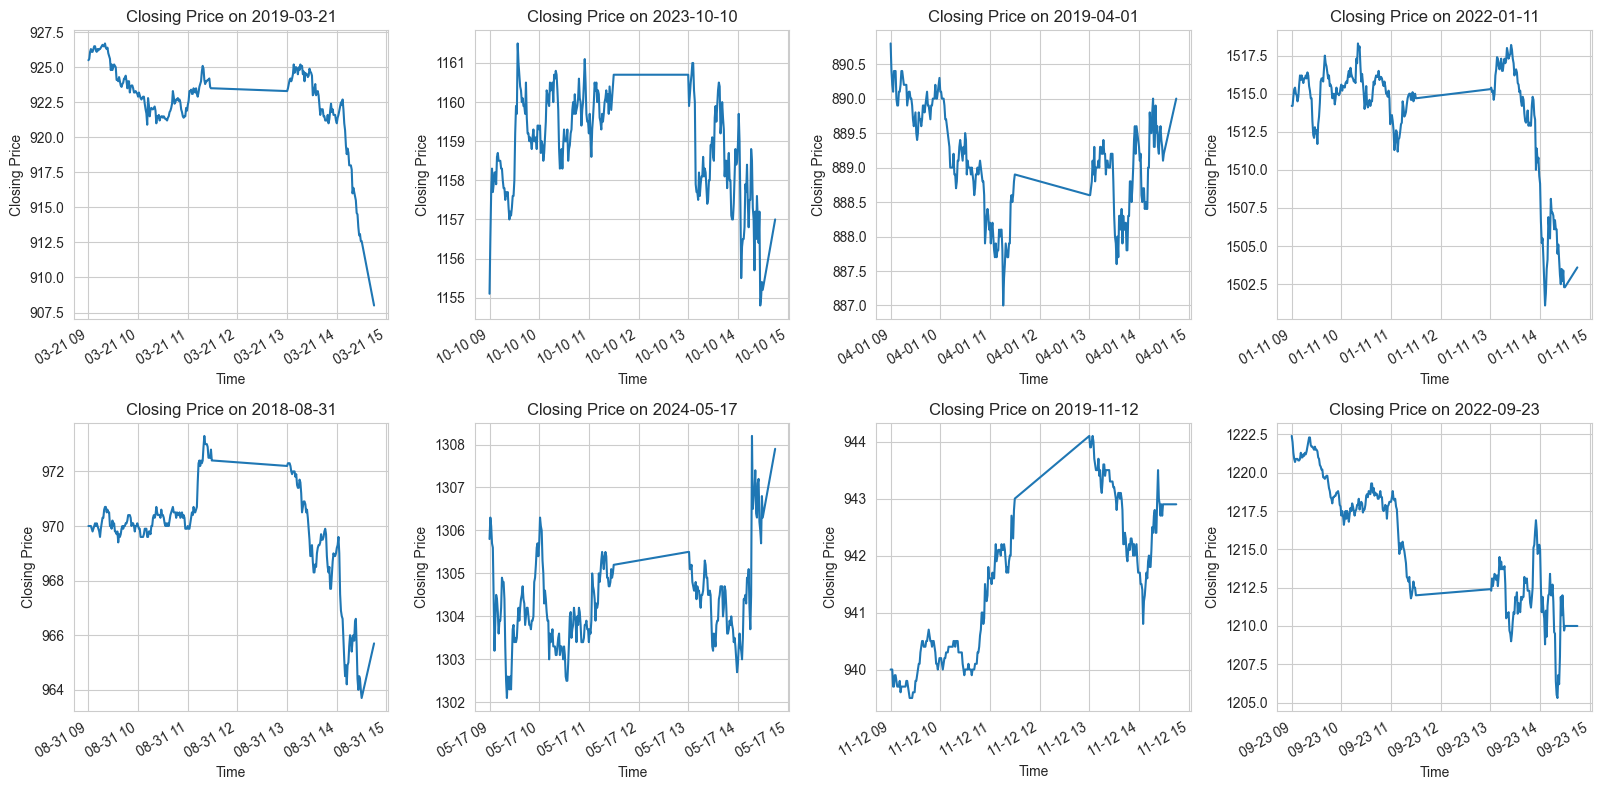

In [25]:
import random
import matplotlib.pyplot as plt

# Hàm để lấy ngẫu nhiên 8 ngày
def get_random_days(data, num_days=8):
    # Lấy danh sách các ngày có trong dữ liệu
    days = data.index.normalize().unique()
    # Chọn ngẫu nhiên các ngày
    selected_days = random.sample(list(days), num_days)
    return selected_days

# Hàm để lấy dữ liệu trong khoảng thời gian một ngày
def get_data_for_day(data, day):
    return data[data.index.normalize() == day]

# Lấy 8 ngày ngẫu nhiên
selected_days = get_random_days(sub_df, num_days=8)

# Tạo các subplots
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Vẽ dữ liệu cho mỗi ngày ngẫu nhiên
for i, day in enumerate(selected_days):
    row = i // 4
    col = i % 4
    day_data = get_data_for_day(sub_df, day)
    day_data['Close'].plot(ax=axs[row, col], legend=False)
    axs[row, col].set_title(f'Closing Price on {day.date()}')
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Closing Price')

plt.tight_layout()
plt.show()


Biến Động Trong Ngày: Mỗi ngày được chọn cho thấy giá đóng cửa có sự biến động mạnh trong suốt ngày, đặc biệt là vào cuối ngày. 

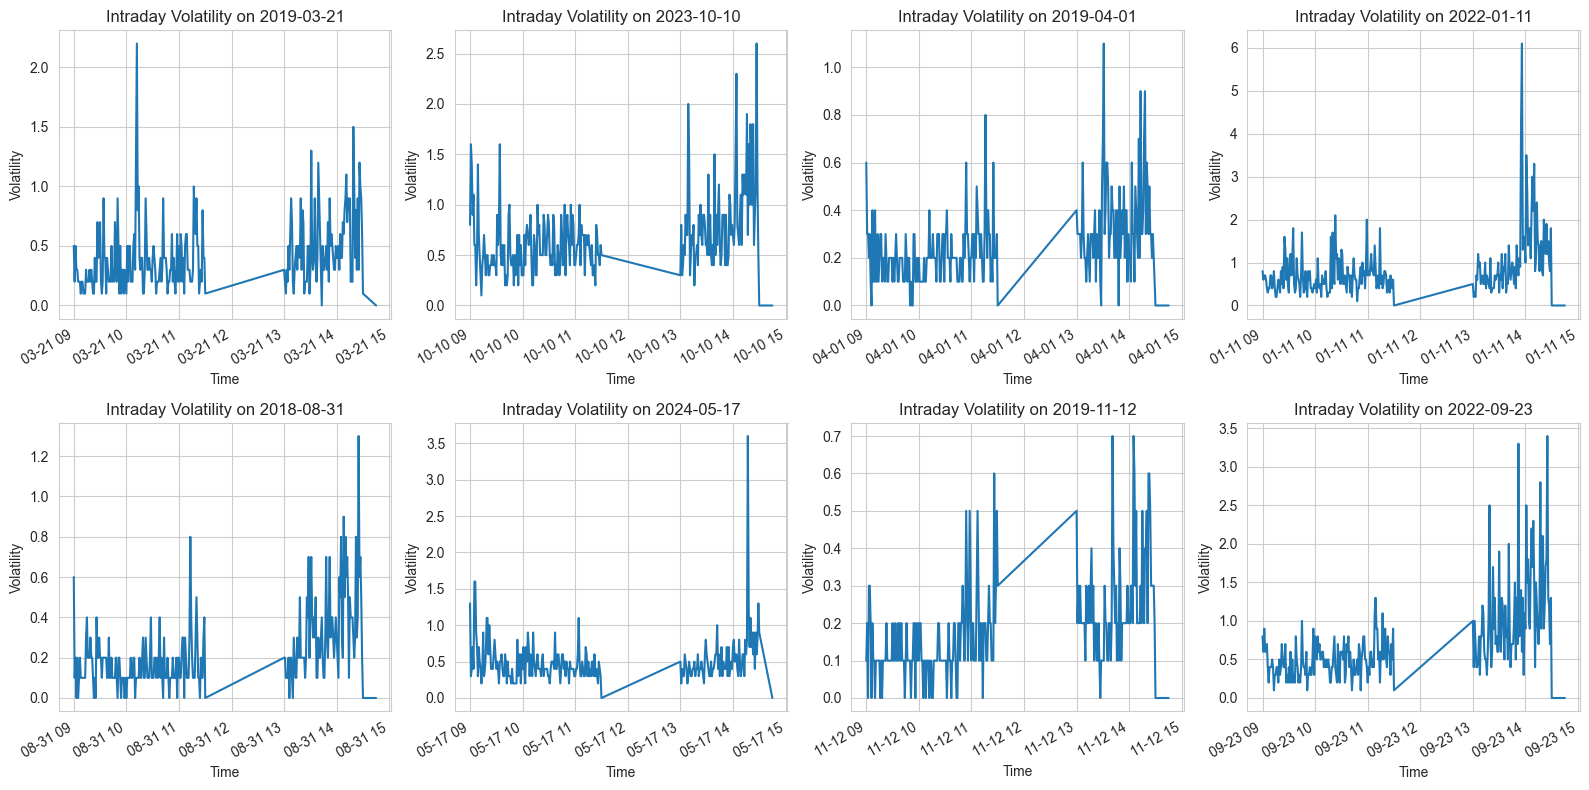

In [26]:
# Hàm để tính toán biến động trong ngày
def calculate_intraday_volatility(data):
    data = data.copy()  # Tạo bản sao của DataFrame để tránh SettingWithCopyWarning
    data.loc[:, 'Intraday Volatility'] = data['High'] - data['Low']
    return data

# Tạo các subplots cho biến động trong ngày
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Vẽ biến động trong ngày cho mỗi ngày ngẫu nhiên
for i, day in enumerate(selected_days):
    row = i // 4
    col = i % 4
    day_data = get_data_for_day(sub_df, day)
    day_data = calculate_intraday_volatility(day_data)
    day_data['Intraday Volatility'].plot(ax=axs[row, col], legend=False)
    axs[row, col].set_title(f'Intraday Volatility on {day.date()}')
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Volatility')

plt.tight_layout()
plt.show()

- Sự Không Ổn Định: Cả giá đóng cửa và biến động trong ngày đều cho thấy mức độ không ổn định cao, phản ánh tính biến động của thị trường.
- Tâm Lý Thị Trường: Những biến động này có thể phản ánh tâm lý thị trường thay đổi nhanh chóng
- Thời Gian Giao Dịch Cuối Ngày: Hoạt động giao dịch cuối ngày dường như rất quan trọng, với nhiều biến động lớn xảy ra vào cuối ngày, có thể do các nhà đầu tư điều chỉnh vị thế trước khi thị trường đóng cửa.

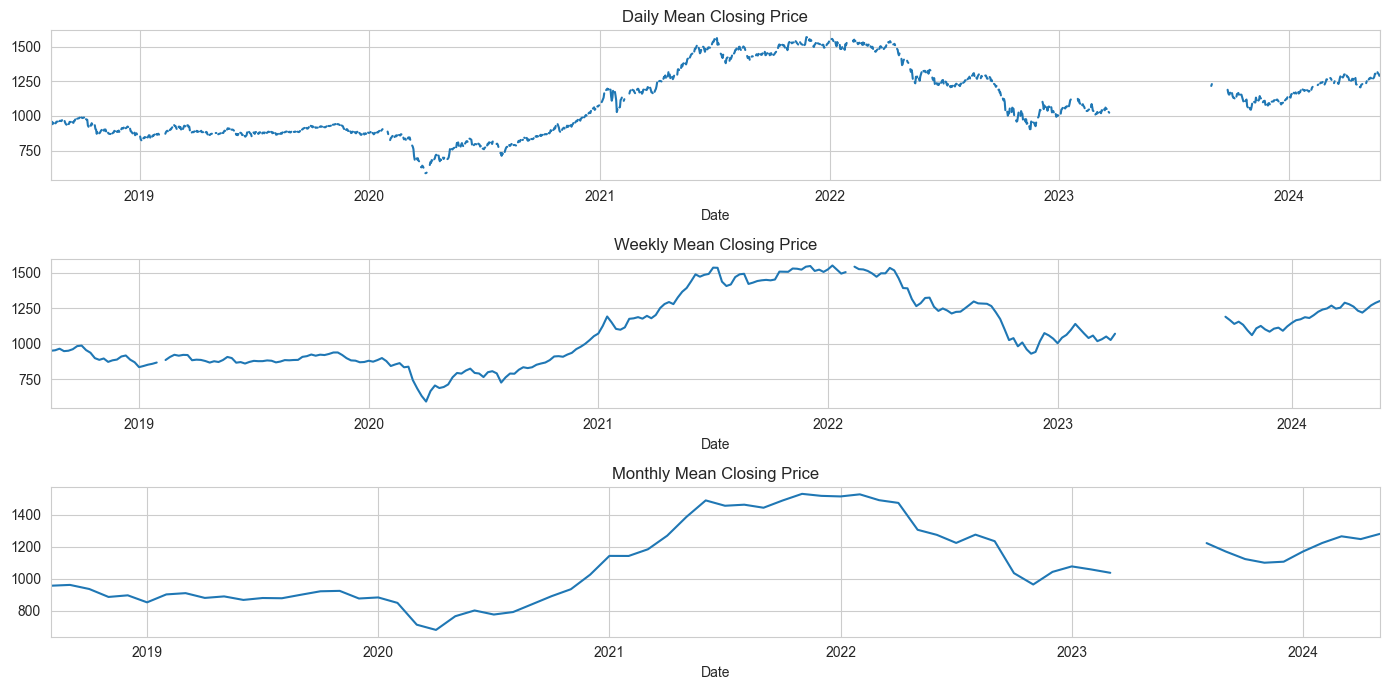

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Chuyển đổi dữ liệu thành chuỗi thời gian nếu chưa
sub_df.index = pd.to_datetime(sub_df.index)

# Tính giá đóng cửa trung bình hàng ngày, hàng tuần và hàng tháng
daily_mean = sub_df['Close'].resample('D').mean()
weekly_mean = sub_df['Close'].resample('W').mean()
monthly_mean = sub_df['Close'].resample('M').mean()

# Vẽ biểu đồ giá đóng cửa trung bình
plt.figure(figsize=(14, 7))
plt.subplot(3, 1, 1)
daily_mean.plot(title='Daily Mean Closing Price')
plt.subplot(3, 1, 2)
weekly_mean.plot(title='Weekly Mean Closing Price')
plt.subplot(3, 1, 3)
monthly_mean.plot(title='Monthly Mean Closing Price')
plt.tight_layout()
plt.show()


- Xu Hướng Dài Hạn: Cả ba biểu đồ đều cho thấy một xu hướng tăng dài hạn từ năm 2019 đến năm 2021, tiếp theo là một sự điều chỉnh giảm vào năm 2022 và một xu hướng hồi phục nhẹ vào năm 2023-2024.

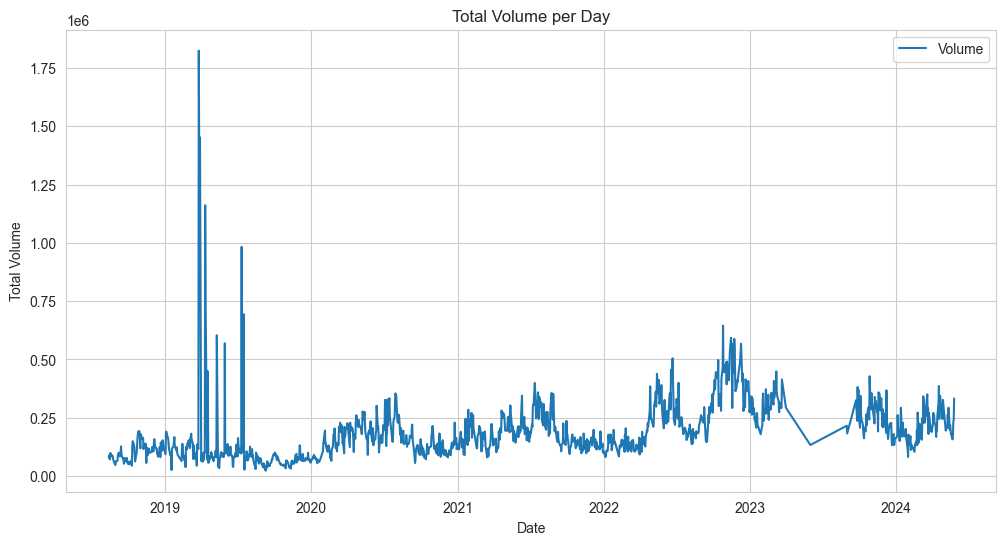

In [28]:
daily_sum = sub_df['Volume'].groupby(sub_df.index.date).sum()

daily_sum.plot(legend=True, figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.title('Total Volume per Day')
plt.show()

Xu hướng tổng quan:
Khối lượng giao dịch cao trong năm 2019, có một số đỉnh điểm lên đến 1.75 triệu đơn vị, có thể do sự kiện quan trọng hoặc biến động lớn trên thị trường.
Khối lượng giao dịch giảm đáng kể từ năm 2020 đến 2021, duy trì ở mức trung bình khoảng 0.25 triệu đơn vị, có thể do lo ngại từ đại dịch Covid-19 và giảm hứng thú đầu tư.
Từ năm 2022 đến 2024, khối lượng giao dịch có xu hướng tăng trở lại nhưng vẫn duy trì ở mức trung bình khoảng 0.25 triệu đơn vị, cho thấy sự ổn định hơn trong giao dịch.

Tổng quan:
Giá chứng khoán và khối lượng giao dịch có mối liên hệ chặt chẽ:
Khi giá chứng khoán tăng mạnh trong giai đoạn 2020-2021, khối lượng giao dịch không tăng tương ứng, cho thấy sự thận trọng từ phía nhà đầu tư.
Khối lượng giao dịch cao trong năm 2019 có thể là dấu hiệu của những sự kiện hoặc biến động lớn, mặc dù giá chứng khoán không thay đổi quá nhiều.

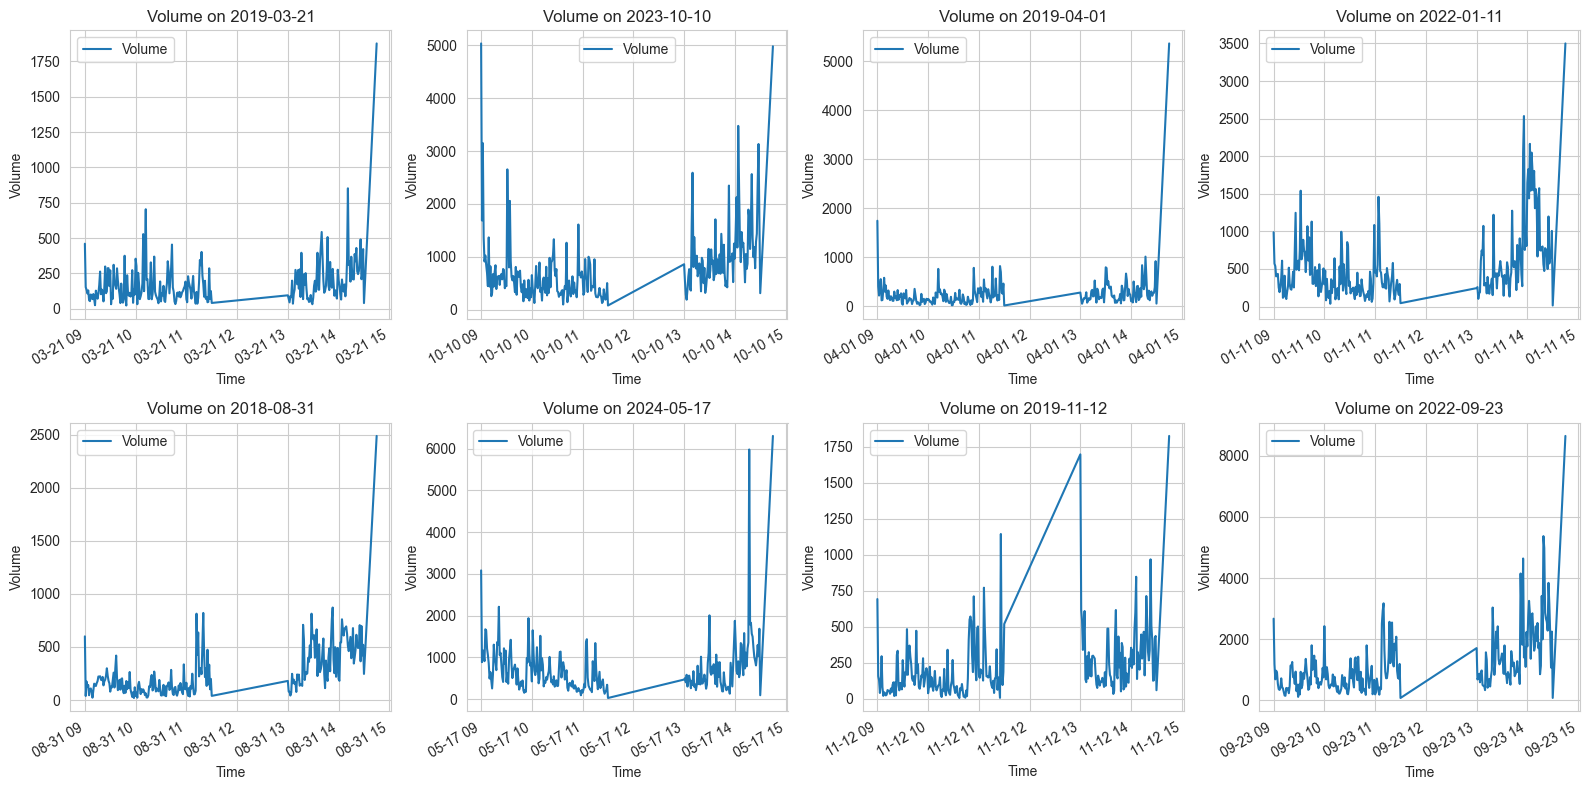

In [29]:
import random
import matplotlib.pyplot as plt

# Tạo các subplots cho biến động trong ngày
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Vẽ biến động trong ngày cho mỗi ngày ngẫu nhiên
for i, day in enumerate(selected_days):
    row = i // 4
    col = i % 4
    day_data = get_data_for_day(sub_df, day)
    day_data = calculate_intraday_volatility(day_data)
    day_data['Volume'].plot(ax=axs[row, col], legend=True)
    axs[row, col].set_title(f'Volume on {day.date()}')
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Volume')
plt.tight_layout()
plt.show()

Mẫu chung là khối lượng giao dịch tăng mạnh vào cuối ngày, cho thấy các nhà đầu tư thường có xu hướng điều chỉnh vị thế của họ trước khi kết thúc phiên giao dịch.

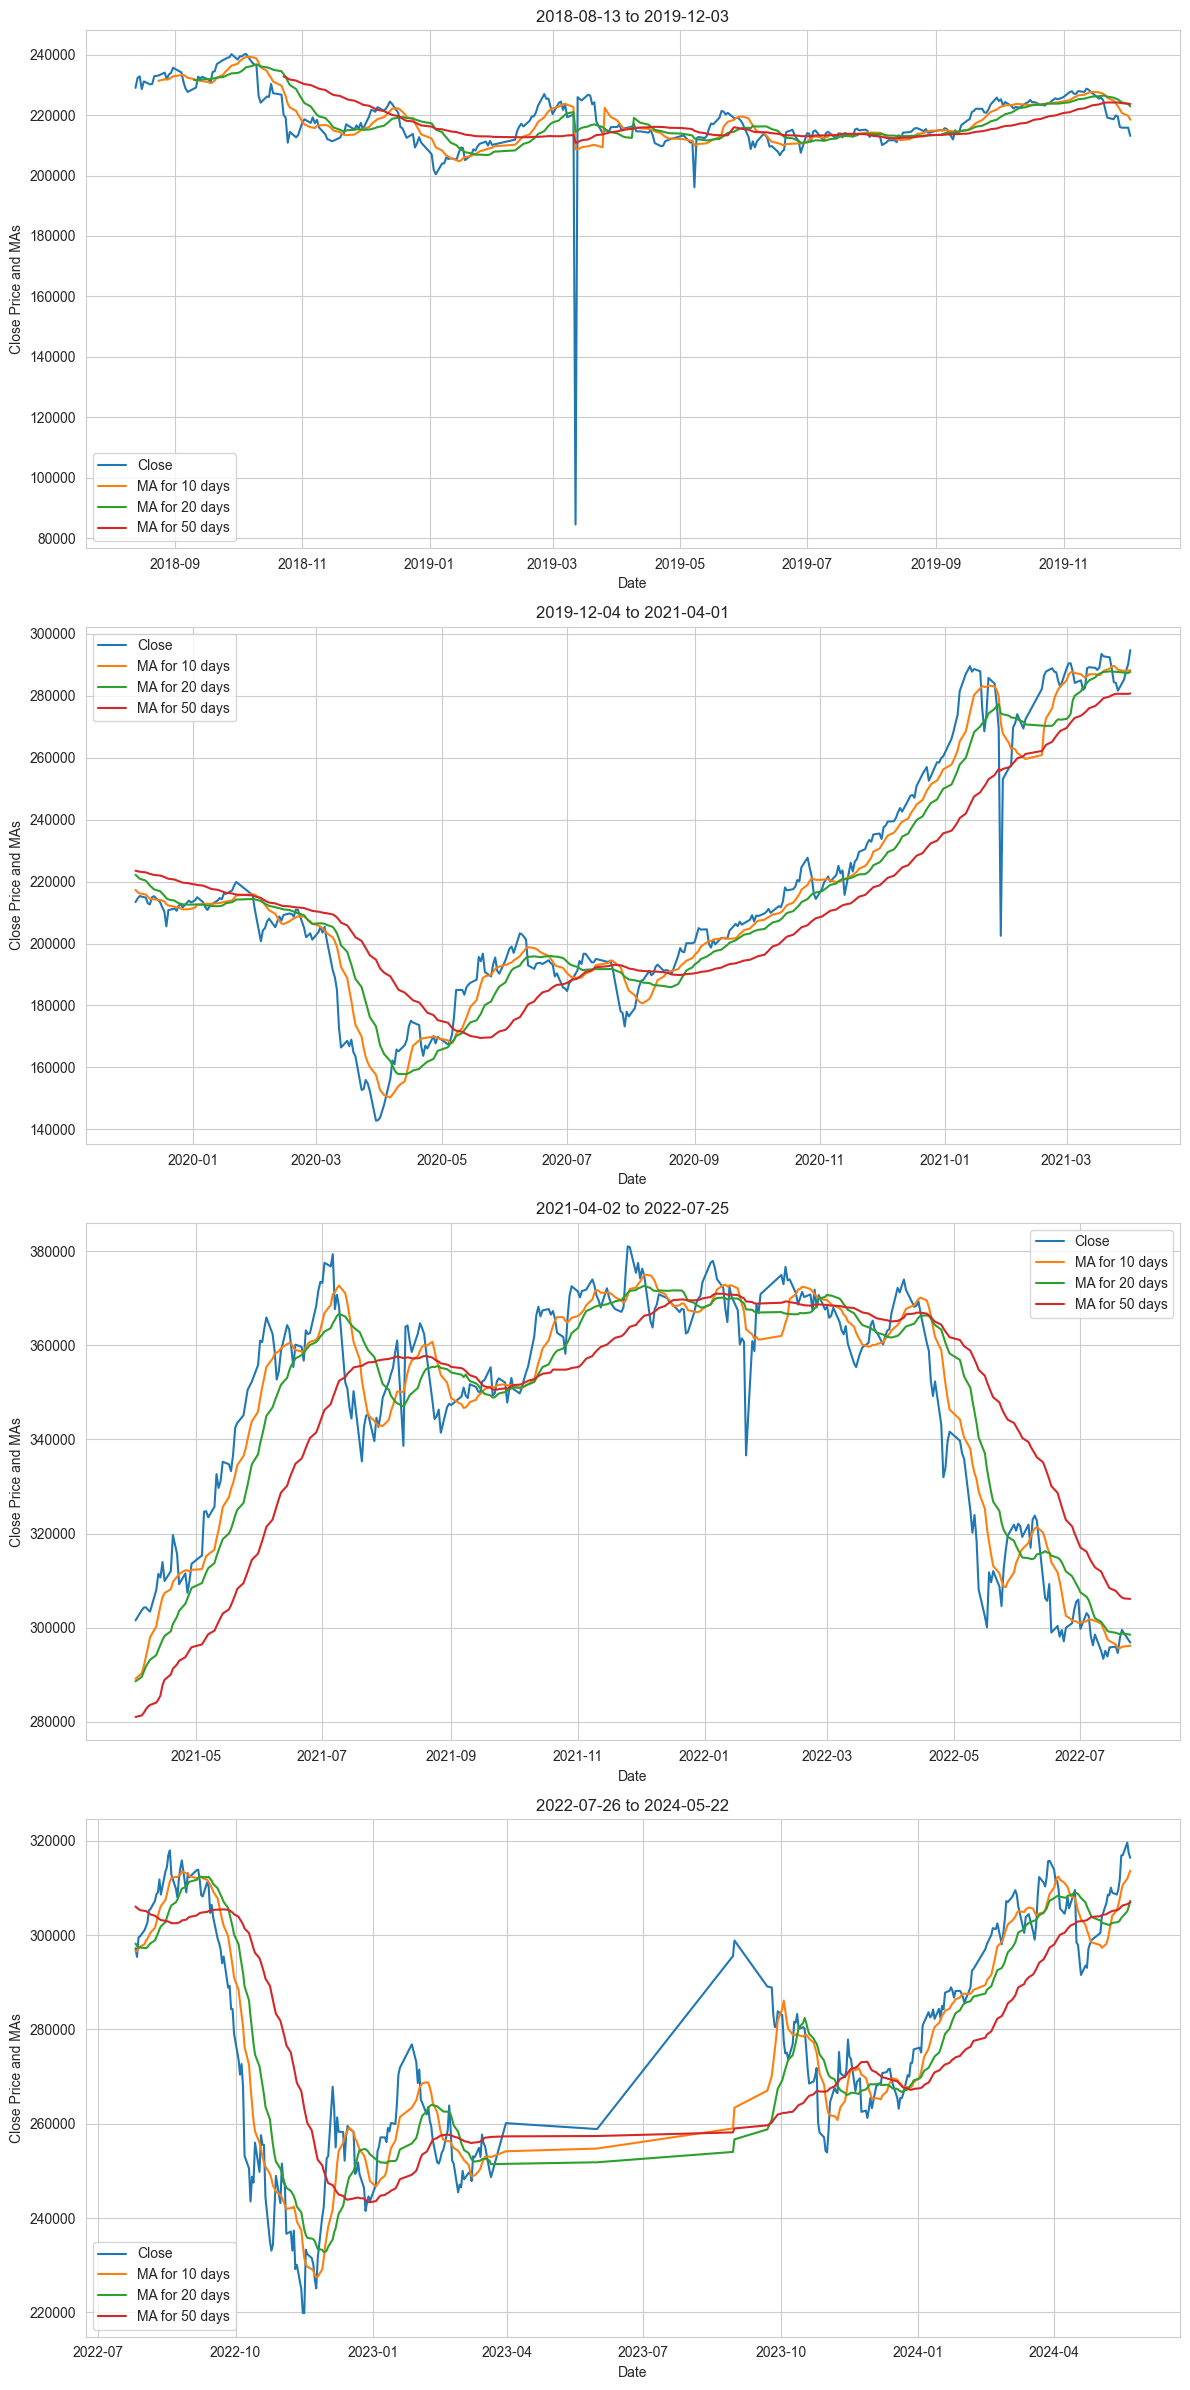

In [30]:
# Nhóm dữ liệu theo ngày và tính tổng cột Close
daily_sum = sub_df['Close'].groupby(sub_df.index.date).sum()

# Chuyển lại thành DataFrame
daily_sum_df = daily_sum.to_frame(name='Close')

# Tính các đường trung bình động
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    daily_sum_df[column_name] = daily_sum_df['Close'].rolling(window=ma).mean()

# Chọn cột cần thiết để vẽ
plot_columns = ['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']
data_to_plot = daily_sum_df[plot_columns]

# Chia dữ liệu thành 4 phần bằng nhau
n = len(data_to_plot)
step = n // 4
parts = [data_to_plot.iloc[i:i + step] for i in range(0, n, step)]

# Tạo các subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 24))

for i, part in enumerate(parts):
    if i < len(axs):  # Kiểm tra xem chỉ vẽ đồ thị nếu vẫn còn subplot
        part.plot(ax=axs[i], legend=True)
        start_date = part.index[0].strftime('%Y-%m-%d')
        end_date = part.index[-1].strftime('%Y-%m-%d')
        axs[i].set_title(f'{start_date} to {end_date}')
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel('Close Price and MAs')

# Điều chỉnh layout để đồ thị không bị chèn lấn
plt.tight_layout()
plt.show()

Biểu đồ từ 2018-08-13 đến 2019-12-03:

Diễn biến giá đóng cửa và các đường trung bình động:
Đường giá đóng cửa (Close) có xu hướng dao động trong khoảng từ 200,000 đến 240,000.
Các đường trung bình động (Moving Averages) cho 10 ngày, 20 ngày, và 50 ngày cho thấy xu hướng chung của giá:
Đường MA 10 ngày (màu cam) phản ánh biến động giá ngắn hạn và thường xuyên bám sát đường giá đóng cửa.
Đường MA 20 ngày (màu xanh lá) biểu thị xu hướng trung hạn và ít biến động hơn so với đường MA 10 ngày.
Đường MA 50 ngày (màu đỏ) phản ánh xu hướng dài hạn, ít thay đổi và có xu hướng mượt hơn.
Có một số đợt giảm giá đáng chú ý, đặc biệt là vào khoảng đầu năm 2019, khi giá giảm mạnh nhưng nhanh chóng hồi phục.
Biểu đồ từ 2019-12-04 đến 2021-04-01:

Diễn biến giá đóng cửa và các đường trung bình động:
Giá đóng cửa bắt đầu khoảng 220,000 và tăng lên gần 300,000 vào cuối giai đoạn.
Đường MA 10 ngày, 20 ngày, và 50 ngày đều thể hiện xu hướng tăng trong dài hạn.
Biểu đồ này cho thấy một xu hướng tăng mạnh mẽ từ giữa năm 2020 đến đầu năm 2021, có thể phản ánh sự phục hồi sau giai đoạn giảm giá trước đó.
Biểu đồ từ 2021-04-02 đến 2022-07-25:

Diễn biến giá đóng cửa và các đường trung bình động:
Giá đóng cửa có xu hướng dao động mạnh hơn trong khoảng từ 280,000 đến 380,000.
Đường MA 10 ngày và 20 ngày thường xuyên cắt nhau, cho thấy sự biến động mạnh trong ngắn hạn và trung hạn.
Đường MA 50 ngày cho thấy xu hướng chung, ít biến động hơn nhưng vẫn theo xu hướng tăng rồi giảm.
Biểu đồ từ 2022-07-26 đến 2024-05-22:

Diễn biến giá đóng cửa và các đường trung bình động:
Giá đóng cửa bắt đầu khoảng 220,000 và tăng lên trên 300,000 vào cuối giai đoạn.
Đường MA 10 ngày và 20 ngày có nhiều lần cắt nhau, phản ánh sự biến động giá ngắn hạn và trung hạn.
Đường MA 50 ngày phản ánh xu hướng tăng dài hạn từ giữa năm 2023 đến đầu năm 2024.
Nhận xét tổng quan:

Các biểu đồ cho thấy sự biến động giá chứng khoán phái sinh VN30 qua các giai đoạn khác nhau, với nhiều đợt tăng giảm mạnh.
Các đường trung bình động giúp làm mượt các biến động ngắn hạn và cho thấy xu hướng chung của giá trong các khoảng thời gian khác nhau.
Các đợt tăng giảm giá có thể phản ánh các sự kiện kinh tế, chính trị hoặc các thay đổi quan trọng trên thị trường.


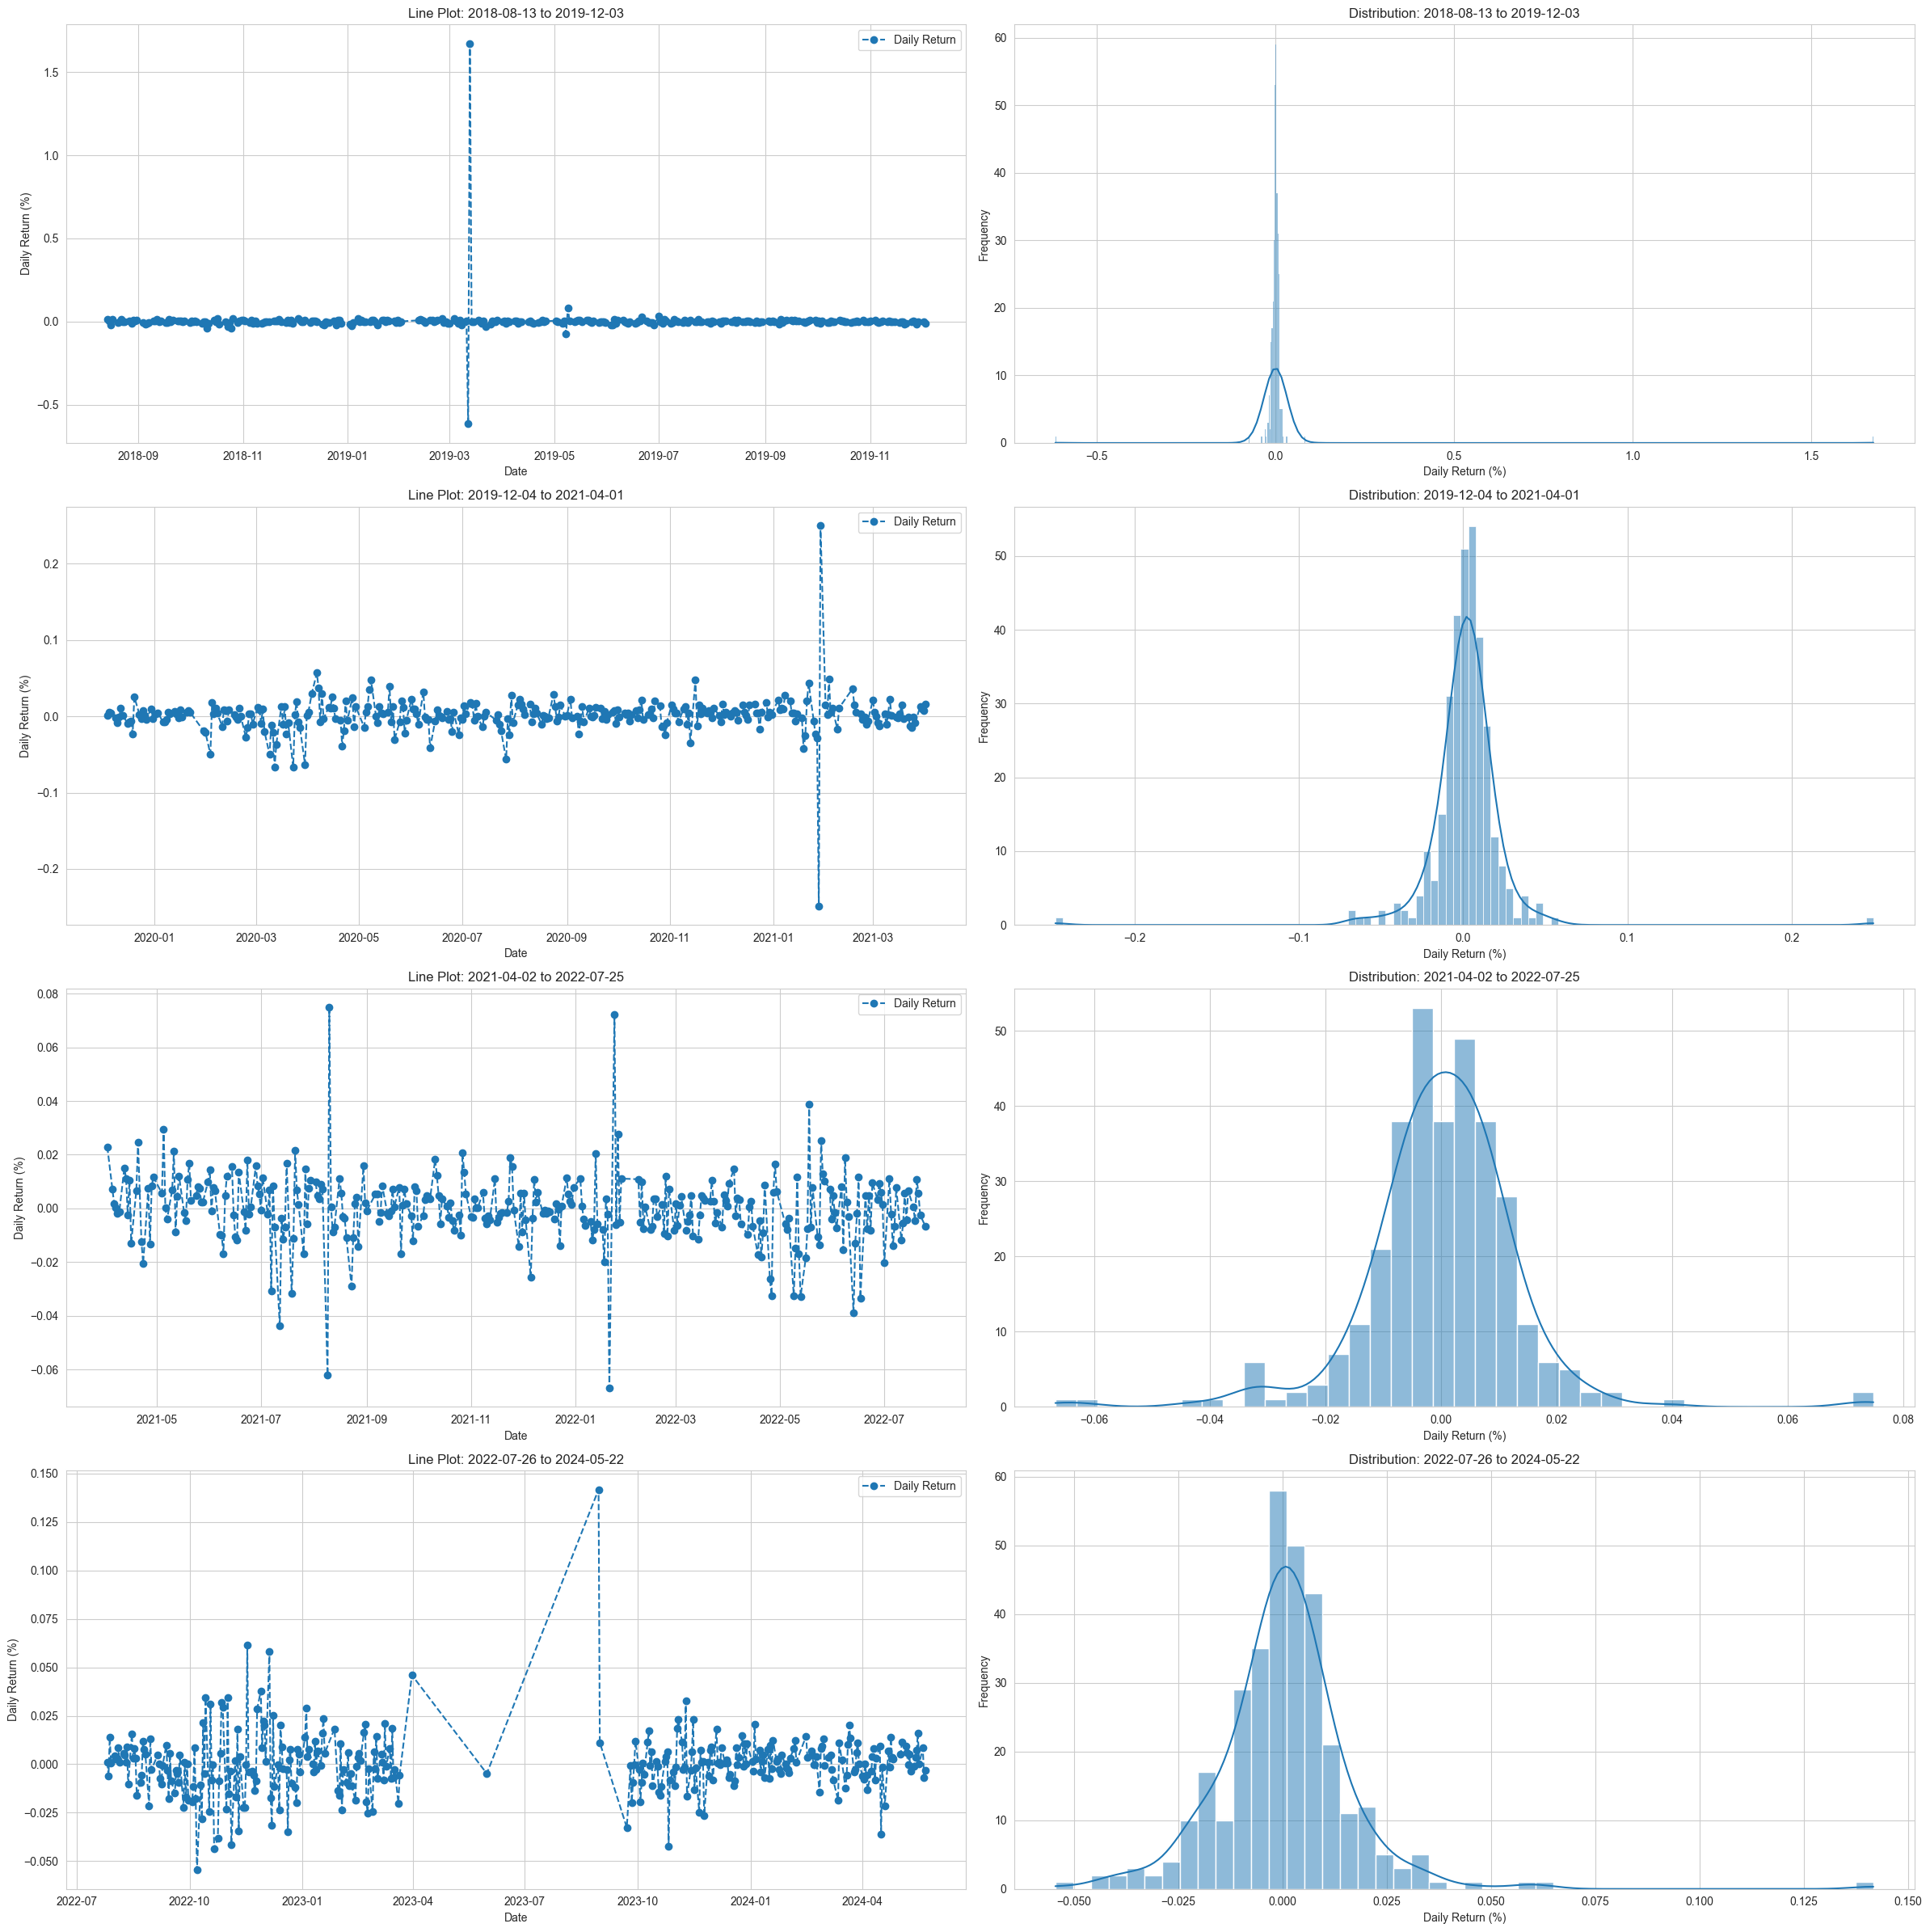

In [31]:
# Tính phần trăm thay đổi hàng ngày
daily_sum_df['Daily Return'] = daily_sum_df['Close'].pct_change()

# Chia dữ liệu thành 4 phần bằng nhau
n = len(daily_sum_df)
step = n // 4
parts = [daily_sum_df.iloc[i:i + step] for i in range(0, n, step)]

# Tạo các subplots cho kết hợp hai loại biểu đồ
fig, axs = plt.subplots(4, 2, figsize=(24, 24))

# Vẽ đồ thị cho mỗi phần
for i, part in enumerate(parts):
    if i < len(axs):  # Kiểm tra xem chỉ vẽ đồ thị nếu vẫn còn subplot
        # Plot daily return line plot
        part['Daily Return'].plot(ax=axs[i, 0], legend=True, linestyle='--', marker='o')
        start_date = part.index[0].strftime('%Y-%m-%d')
        end_date = part.index[-1].strftime('%Y-%m-%d')
        axs[i, 0].set_title(f'Line Plot: {start_date} to {end_date}')
        axs[i, 0].set_xlabel('Date')
        axs[i, 0].set_ylabel('Daily Return (%)')
        
        # Plot daily return distribution
        sns.histplot(part['Daily Return'].dropna(), kde=True, ax=axs[i, 1])
        axs[i, 1].set_title(f'Distribution: {start_date} to {end_date}')
        axs[i, 1].set_xlabel('Daily Return (%)')
        axs[i, 1].set_ylabel('Frequency')

# Điều chỉnh layout để đồ thị không bị chèn lấn
plt.tight_layout()
plt.show()

Giai đoạn từ 2018-08-13 đến 2019-12-03 cho thấy thị trường ổn định với một số đỉnh nổi bật. Sự tự tương quan thấp của lợi tức hàng ngày làm cho việc dự đoán trở nên khó khăn. Tuy nhiên, các sự kiện cực đoan đã xảy ra, nhấn mạnh tầm quan trọng của việc quản lý rủi ro hiệu quả.
- Phân bố tỷ suất lợi nhuận chủ yếu tập trung ở mức 0%, với một vài giá trị ngoại lai lớn.
- Điều này phản ánh rằng lợi tức hàng ngày thường có tự tương quan thấp (low autocorrelation), tức là khả năng dự đoán lợi tức dựa trên quá khứ là hạn chế.
Giai đoạn từ 2019-12-04 đến 2021-04-01 cho thấy sự ổn định tiếp tục của thị trường, nhưng với sự bất ổn tăng cao do đại dịch COVID-19. Thị trường dần hồi phục nhưng vẫn còn những biến động nhỏ do các đợt bùng phát COVID-19 mới và các biện pháp kinh tế kích thích.
- Phân bố tỷ suất lợi nhuận tập trung nhiều ở mức 0%, nhưng có nhiều biến động hơn so với giai đoạn trước.
- Giai đoạn này bao gồm đợt bùng phát COVID-19, ảnh hưởng mạnh đến thị trường toàn cầu.
Giai đoạn từ 2021-04-02 đến 2022-07-25 cho thấy sự biến động tăng cao, có thể do sự phục hồi kinh tế sau đại dịch COVID-19. Thị trường dần hồi phục nhưng vẫn còn những biến động nhỏ do các đợt bùng phát COVID-19 mới và các biện pháp kinh tế kích thích.
- Tỷ suất lợi nhuận hàng ngày trong giai đoạn này cho thấy sự biến động đều, không có sự kiện đột ngột như các giai đoạn trước.
- Điều này cho thấy thị trường bắt đầu có dấu hiệu phục hồi và ổn định trở lại.
Giai đoạn từ 2022-07-26 đến 2024-05-22 cho thấy sự biến động cao nhất, phản ánh sự nhạy cảm của thị trường đối với cả sự kiện trong nước và quốc tế. Các yếu tố như căng thẳng địa chính trị, sự không chắc chắn của kinh tế toàn cầu và các thay đổi chính sách lớn ở Việt Nam đã tác động đến môi trường kinh doanh và đầu tư, gây ra những phản ứng mạnh mẽ trên thị trường.
- Phân bố tỷ suất lợi nhuận có sự lan tỏa rộng hơn, với nhiều giá trị ngoại lai.
- Tỷ suất lợi nhuận hàng ngày trong giai đoạn này có sự biến động nhiều, đặc biệt vào đầu năm 2023.

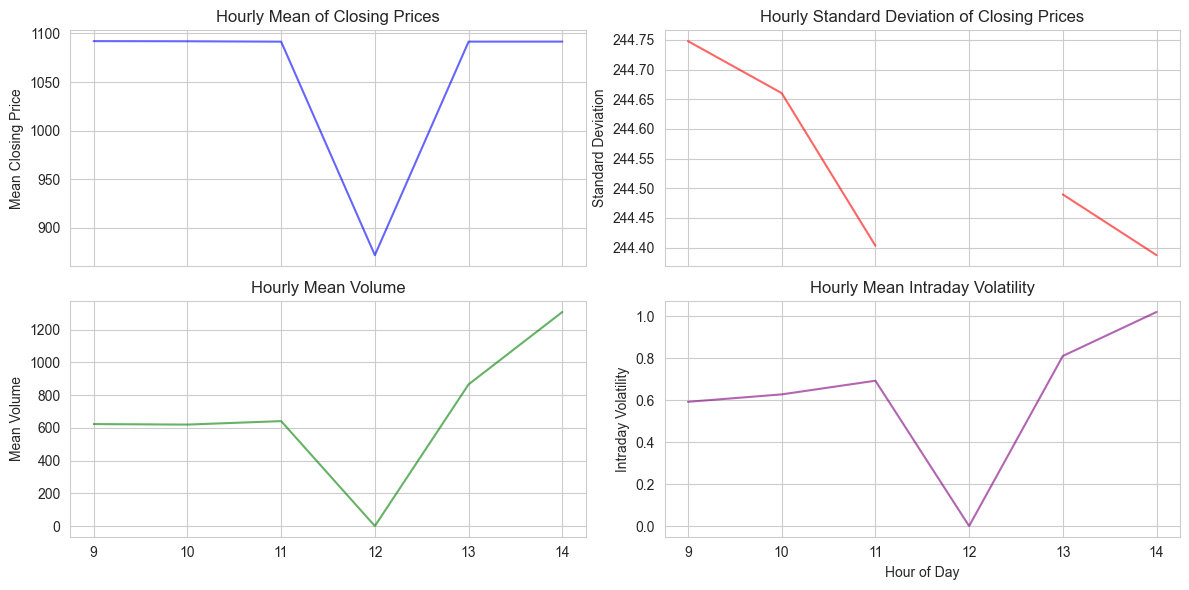

In [32]:
# Thêm cột giờ vào DataFrame
sub_df['Hour'] = sub_df.index.hour

# Tính toán các chỉ số theo giờ
hourly_mean = sub_df.groupby('Hour')['Close'].mean()
hourly_std = sub_df.groupby('Hour')['Close'].std()
hourly_volume = sub_df.groupby('Hour')['Volume'].mean()
sub_df['Intraday Volatility'] = sub_df['High'] - sub_df['Low']
hourly_volatility_mean = sub_df.groupby('Hour')['Intraday Volatility'].mean()

fig, axs = plt.subplots(2, 2, figsize=(12, 6), sharex=True)

# Vẽ biểu đồ trung bình giá đóng cửa theo giờ
axs[0, 0].plot(hourly_mean.index, hourly_mean, color='blue', alpha=0.6)
axs[0, 0].set_title('Hourly Mean of Closing Prices')
axs[0, 0].set_ylabel('Mean Closing Price')

# Vẽ biểu đồ độ lệch chuẩn giá đóng cửa theo giờ
axs[0, 1].plot(hourly_std.index, hourly_std, color='red', alpha=0.6)
axs[0, 1].set_title('Hourly Standard Deviation of Closing Prices')
axs[0, 1].set_ylabel('Standard Deviation')

# Vẽ biểu đồ khối lượng giao dịch trung bình theo giờ
axs[1, 0].plot(hourly_volume.index, hourly_volume, color='green', alpha=0.6)
axs[1, 0].set_title('Hourly Mean Volume')
axs[1, 0].set_ylabel('Mean Volume')

# Vẽ biểu đồ biến động giá trung bình trong ngày theo giờ
axs[1, 1].plot(hourly_volatility_mean.index, hourly_volatility_mean, color='purple', alpha=0.6)
axs[1, 1].set_title('Hourly Mean Intraday Volatility')
axs[1, 1].set_xlabel('Hour of Day')
axs[1, 1].set_ylabel('Intraday Volatility')

# Tùy chỉnh bố cục và hiển thị biểu đồ
plt.tight_layout()
plt.show()

- Giảm Hoạt Động vào Giữa Ngày: Cả giá đóng cửa trung bình, độ lệch chuẩn và khối lượng giao dịch đều cho thấy sự giảm hoạt động vào giữa ngày, đặc biệt là vào giờ trưa. Điều này có thể do sự giảm thanh khoản và sự nghỉ ngơi của các nhà giao dịch.
- Tăng Hoạt Động Cuối Ngày: Khối lượng giao dịch và biến động giá tăng mạnh vào buổi chiều, đặc biệt là gần giờ đóng cửa. Điều này có thể do các nhà giao dịch điều chỉnh vị thế của họ và phản ứng với thông tin thị trường trước khi phiên giao dịch kết thúc.
- Thời Điểm Quan Trọng: Giờ trưa và giờ đóng cửa là những thời điểm quan trọng với biến động mạnh và khối lượng giao dịch lớn, có thể ảnh hưởng lớn đến chiến lược giao dịch và quyết định đầu tư.

Text(50, 50, 'VN30F1M')

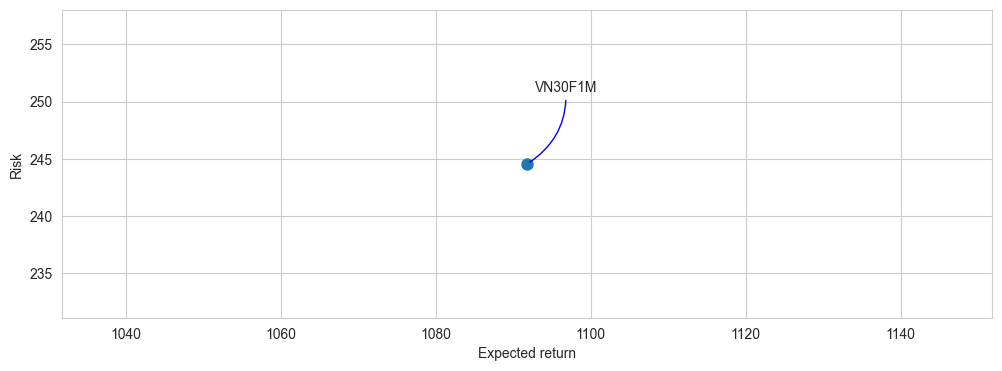

In [33]:
rets = sub_df["Close"].dropna()

area = np.pi * 20

plt.figure(figsize=(12, 4))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

plt.annotate('VN30F1M', xy=(rets.mean(), rets.std()), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
            arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


Tỷ suất lợi nhuận kỳ vọng: 1100
Rủi ro (độ lệch chuẩn): 245
--> Lợi nhuận kỳ vọng cao nhưng rủi ro cũng cao
--> Cần thêm mô hình để giảm rủi ro hơn
vi du:
*Nhà đầu tư A*:
Đầu tư vào VN30F1M:
Mua 100 cổ phiếu VN30F1M.
Lợi nhuận kỳ vọng: 100 * 1100 = 110,000.
Rủi ro kỳ vọng (độ lệch chuẩn tổng hợp): 100 * 245 = 24,500.
Kế hoạch đa dạng hóa: Đầu tư thêm vào trái phiếu hoặc quỹ đầu tư an toàn với lợi nhuận thấp nhưng ít rủi ro để cân bằng danh mục.
*Nhà đầu tư B*:
Không đầu tư vào VN30F1M:
Tìm kiếm cổ phiếu khác có tỷ suất lợi nhuận kỳ vọng là 500 nhưng rủi ro chỉ là 100.
Đầu tư vào cổ phiếu này và một phần vào trái phiếu.
Mua 100 cổ phiếu mới:
Lợi nhuận kỳ vọng: 100 * 500 = 50,000.
Rủi ro kỳ vọng: 100 * 100 = 10,000.

*Thị trường chứng khoán Việt Nam có sự biến động cao và không ổn định, đặc biệt là trong các giai đoạn ngắn hạn và vào cuối ngày giao dịch. Việc áp dụng các mô hình AI để dự đoán và quản lý rủi ro là cần thiết để giúp các nhà đầu tư đưa ra quyết định thông minh và giảm thiểu rủi ro. Các mô hình AI không chỉ giúp dự đoán các biến động giá mà còn cung cấp các chiến lược đầu tư hiệu quả dựa trên phân tích dữ liệu toàn diện.*

### Handling Missing Values

In [34]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

There is no missing values to handle due to directly crawling from Entrade api

### Handling Outliers

In [35]:
columns.extend(['Close', 'Volume'])

In [36]:
# Calculate z-scores to identify outliers
from scipy.stats import zscore
outliers_dfd = {}
for column in columns:
    z_scores = zscore(df[column])
    outliers = (z_scores > 3) | (z_scores < -3)
    outliers_df = df[outliers]
    outliers_dfd[column] = outliers_df.copy()
    print(f'{column}: {outliers_df.shape[0]} outliers')

Open: 0 outliers
High: 0 outliers
Low: 0 outliers
Close: 0 outliers
Volume: 3741 outliers


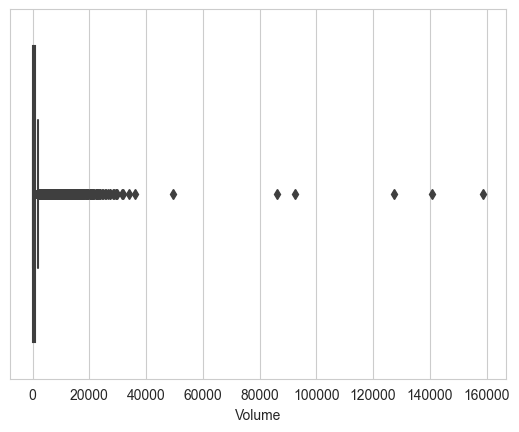

In [37]:
# Use box plots to visualize outliers
import seaborn as sns
sns.boxplot(x=df['Volume'])
plt.show()

Winsorization là gì?
Winsorization là một kỹ thuật biến đổi dữ liệu để giảm tác động của các giá trị outliers bằng cách giới hạn các giá trị cực đại và cực tiểu của dữ liệu vào một ngưỡng nhất định. Trong Python, bạn có thể sử dụng hàm winsorize từ thư viện scipy.stats.mstats để thực hiện điều này.

In [38]:
from scipy.stats.mstats import winsorize
# Áp dụng Winsorization
new_df = sub_df.copy()
new_df['Volume'] = winsorize(new_df['Volume'], limits=[0.05, 0.05])

# Tính toán z-scores và outliers sau khi Winsorization
z_scores_new = zscore(new_df['Volume'])
outliers_new = (z_scores_new > 3) | (z_scores_new < -3)
outliers_df_new = new_df[outliers_new]

print("Số lượng outliers sau Winsorization:", len(outliers_df_new))

Số lượng outliers sau Winsorization: 0


Lợi Nhuận (Returns)
Lợi nhuận, hay "Returns", là một chỉ số quan trọng trong phân tích tài chính và dự đoán. Nó giúp đo lường mức độ thay đổi của giá trị tài sản qua thời gian, từ đó đánh giá hiệu suất đầu tư. Trong bối cảnh dự đoán chứng khoán phái sinh, lợi nhuận giúp ích như sau:

Đánh giá Hiệu Suất Lịch Sử: Bằng cách tính toán lợi nhuận lịch sử, bạn có thể hiểu được xu hướng giá và biến động của tài sản trong quá khứ.
Làm Dữ Liệu Trở Nên Stationary: Nhiều mô hình dự đoán yêu cầu dữ liệu phải stationary (không có xu hướng), lợi nhuận giúp loại bỏ xu hướng của giá và biến chuỗi dữ liệu trở nên stationary.
So Sánh Tương Quan Giữa Các Tài Sản: Lợi nhuận cho phép so sánh hiệu suất giữa các tài sản khác nhau, dù giá trị tuyệt đối của chúng khác nhau.

In [39]:
new_df['Returns'] = new_df['Close'].pct_change()

SMA (Simple Moving Average)
SMA là trung bình cộng của giá trong một khoảng thời gian cụ thể. Nó giúp làm mượt chuỗi dữ liệu và loại bỏ nhiễu, từ đó giúp nhận biết xu hướng tổng quát của giá.

Làm Mượt Dữ Liệu: SMA giúp làm mượt chuỗi giá, từ đó dễ dàng nhận biết xu hướng dài hạn hơn.
Xác Định Xu Hướng: SMA thường được dùng để xác định xu hướng tăng hoặc giảm. Khi giá nằm trên SMA, xu hướng có thể được coi là tăng; ngược lại, khi giá nằm dưới SMA, xu hướng có thể được coi là giảm.
Tín Hiệu Giao Dịch: Các điểm cắt giữa SMA ngắn hạn và dài hạn có thể được dùng làm tín hiệu mua/bán.

In [40]:
new_df['SMA_10'] = new_df['Close'].rolling(window=10).mean()
new_df['SMA_50'] = new_df['Close'].rolling(window=50).mean()

Bollinger Bands
Bollinger Bands gồm một dải giữa (SMA) và hai dải trên/dưới (Upper/Lower Bands) cách nhau một số lần độ lệch chuẩn. Bollinger Bands giúp đo lường độ biến động và xác định các điều kiện quá mua/quá bán.

- Đo Lường Độ Biến Động: Khoảng cách giữa Upper Band và Lower Band cho biết mức độ biến động của giá. Khi khoảng cách này mở rộng, biến động cao; khi thu hẹp, biến động thấp.
- Tín Hiệu Quá Mua/Quá Bán: Khi giá chạm hoặc vượt Upper Band, nó có thể báo hiệu tình trạng quá mua (giá cao và có thể giảm). Ngược lại, khi giá chạm hoặc vượt Lower Band, nó có thể báo hiệu tình trạng quá bán (giá thấp và có thể tăng).
- Xác Định Xu Hướng Tiềm Năng: Khi giá liên tục chạm vào Upper Band trong một thời gian dài, nó có thể cho thấy xu hướng tăng mạnh. Ngược lại, khi giá liên tục chạm vào Lower Band, nó có thể cho thấy xu hướng giảm mạnh.

In [41]:
new_df['Middle_Band'] = new_df['Close'].rolling(window=20).mean()
new_df['Upper_Band'] = new_df['Middle_Band'] + 2 * new_df['Close'].rolling(window=20).std()
new_df['Lower_Band'] = new_df['Middle_Band'] - 2 * new_df['Close'].rolling(window=20).std()

In [42]:
new_df.isnull().sum()

Open                    0
High                    0
Low                     0
Close                   0
Volume                  0
Hour                    0
Intraday Volatility     0
Returns                 1
SMA_10                  9
SMA_50                 49
Middle_Band            19
Upper_Band             19
Lower_Band             19
dtype: int64

In [43]:
new_df = new_df.iloc[50:]
new_df.isnull().sum()

Open                   0
High                   0
Low                    0
Close                  0
Volume                 0
Hour                   0
Intraday Volatility    0
Returns                0
SMA_10                 0
SMA_50                 0
Middle_Band            0
Upper_Band             0
Lower_Band             0
dtype: int64

In [44]:
new_df

,Open,High,Low,Close,Volume,Hour,Intraday Volatility,Returns,SMA_10,SMA_50,Middle_Band,Upper_Band,Lower_Band
Date,,,,,,,,,,,,,
2018-08-13 09:50:00,945.0,945.0,944.4,944.4,366,9,0.6,-0.000635,944.55,943.758,944.325,945.163231,943.486769
2018-08-13 09:51:00,944.5,944.5,944.3,944.5,218,9,0.2,0.000106,944.61,943.786,944.315,945.139046,943.490954
2018-08-13 09:52:00,944.5,945.0,944.4,945.0,124,9,0.6,0.000529,944.68,943.816,944.330,945.193530,943.466470
2018-08-13 09:53:00,945.0,945.4,945.0,945.4,172,9,0.4,0.000423,944.77,943.856,944.380,945.367501,943.392499
2018-08-13 09:54:00,945.4,946.0,945.4,946.0,333,9,0.6,0.000635,944.92,943.914,944.480,945.686299,943.273701
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-24 14:27:00,1277.9,1279.6,1277.9,1279.5,1785,14,1.7,0.001409,1277.72,1280.240,1277.555,1282.422713,1272.687287
2024-05-24 14:28:00,1279.5,1280.5,1279.1,1280.5,1503,14,1.4,0.000782,1278.38,1280.206,1277.610,1282.589072,1272.630928
2024-05-24 14:29:00,1280.8,1280.8,1279.1,1279.1,2078,14,1.7,-0.001093,1278.71,1280.140,1277.510,1282.269434,1272.750566
